In [23]:
#Introduction
#Questions

In [24]:
#Code Directly Copied from "https://healthdata.gov/Hospital/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/g62h-syeh"
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
!pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("healthdata.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(healthdata.gov,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("g62h-syeh", limit=200000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import hvplot.pandas
import numpy as np
import requests
import time
from scipy.stats import linregress
import requests
import json
from pprint import pprint

In [26]:
# View results
results_df.tail()

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage,staffed_icu_pediatric_patients_confirmed_covid,on_hand_supply_therapeutic_c_bamlanivimab_etesevimab_courses,previous_week_therapeutic_c_bamlanivimab_etesevimab_courses_used,previous_day_admission_pediatric_covid_confirmed_0_4,previous_day_admission_pediatric_covid_confirmed_12_17,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_unknown
57191,WA,2021-08-01T00:00:00.000,9,94,2,9,94,2,3,103,...,102,441,102,NaN,121,6,NaN,NaN,NaN,NaN
57192,MT,2021-03-30T00:00:00.000,6,58,1,7,57,1,3,64,...,11,18,11,NaN,26,1,NaN,NaN,NaN,NaN
57193,AK,2021-03-31T00:00:00.000,2,22,0,2,22,0,1,24,...,24,74,24,NaN,113,2,NaN,NaN,NaN,NaN
57194,VA,2021-06-28T00:00:00.000,14,60,20,17,57,20,23,91,...,87,467,87,NaN,718,35,NaN,NaN,NaN,NaN
57195,AZ,2021-04-26T00:00:00.000,26,74,3,28,72,3,4,100,...,84,261,84,NaN,812,28,NaN,NaN,NaN,NaN


In [27]:
# Read state_data.csv
state_info = pd.read_csv("Data/state_data.csv")
state_info.head()

,Abb,Lat,Lon,Pop
0,AL,32.318230,-86.902298,5024356
1,AK,66.160507,-153.369141,733378
2,AZ,34.048927,-111.093735,7151507
3,AR,34.799999,-92.199997,3011555
4,CA,36.778259,-119.417931,39538245


In [28]:
# Remove rows with nan for 'deaths_covid'
drop_deaths = results_df[results_df['deaths_covid'].notna()]
drop_deaths.tail()

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage,staffed_icu_pediatric_patients_confirmed_covid,on_hand_supply_therapeutic_c_bamlanivimab_etesevimab_courses,previous_week_therapeutic_c_bamlanivimab_etesevimab_courses_used,previous_day_admission_pediatric_covid_confirmed_0_4,previous_day_admission_pediatric_covid_confirmed_12_17,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_unknown
57191,WA,2021-08-01T00:00:00.000,9,94,2,9,94,2,3,103,...,102,441,102,NaN,121,6,NaN,NaN,NaN,NaN
57192,MT,2021-03-30T00:00:00.000,6,58,1,7,57,1,3,64,...,11,18,11,NaN,26,1,NaN,NaN,NaN,NaN
57193,AK,2021-03-31T00:00:00.000,2,22,0,2,22,0,1,24,...,24,74,24,NaN,113,2,NaN,NaN,NaN,NaN
57194,VA,2021-06-28T00:00:00.000,14,60,20,17,57,20,23,91,...,87,467,87,NaN,718,35,NaN,NaN,NaN,NaN
57195,AZ,2021-04-26T00:00:00.000,26,74,3,28,72,3,4,100,...,84,261,84,NaN,812,28,NaN,NaN,NaN,NaN


In [29]:
#
deaths_df = drop_deaths[['deaths_covid','state']]
deaths_df['dead'] = deaths_df['deaths_covid'].astype(int)
deaths_df.tail()

c:\Users\jduck\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,deaths_covid,state,dead
57191,5,WA,5
57192,0,MT,0
57193,1,AK,1
57194,2,VA,2
57195,21,AZ,21


In [30]:
# List of state to iterate and empty list to add max death
states = state_info['Abb']
max_death = []

for state in states:
    state2 = state[0:2]
    filter_df = deaths_df[deaths_df['state'] == state2]
    maxdead = filter_df['dead'].max()
    max_death.append(maxdead)

state_info['max_death'] = max_death
state_info.head()

,Abb,Lat,Lon,Pop,max_death
0,AL,32.318230,-86.902298,5024356,69
1,AK,66.160507,-153.369141,733378,19
2,AZ,34.048927,-111.093735,7151507,289
3,AR,34.799999,-92.199997,3011555,79
4,CA,36.778259,-119.417931,39538245,567


In [31]:
# Standardize daily death to per 1000000
per = state_info['max_death'] * 10000000 / state_info['Pop']
state_info['max_per_million'] = per
state_info.head()

,Abb,Lat,Lon,Pop,max_death,max_per_million
0,AL,32.318230,-86.902298,5024356,69,137.331033
1,AK,66.160507,-153.369141,733378,19,259.075129
2,AZ,34.048927,-111.093735,7151507,289,404.110630
3,AR,34.799999,-92.199997,3011555,79,262.322953
4,CA,36.778259,-119.417931,39538245,567,143.405455


In [32]:
%%capture --no-display

# Configure the map plot
death_map = state_info.hvplot.points('Lon','Lat', alpha = 0.5, geo=True, tiles='OSM', color = 'Abb', size = 'max_per_million',hover_cols=['Abb','max_death'],frame_width = 700,
    frame_height = 500 )
# Display the map
death_map

ImportError: Geographic projection support requires GeoViews, pyproj and cartopy.

In [ ]:
#explanation^^^

In [33]:
# User select state
#state_request = input("Enter state two letter abbreviation code: ")
state_request = "CA"


In [34]:
# Filter data down to state, change date format, get data for 2020 and 2021
state_results_df = results_df[results_df['state'] == state_request]
state_results_df['date'] = pd.to_datetime(state_results_df['date'], format='%Y-%m-%d')
state_20_21_df = state_results_df.loc[(state_results_df['date'] < '2022-01-01')]
state_20_21_df.head()

c:\Users\jduck\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage,staffed_icu_pediatric_patients_confirmed_covid,on_hand_supply_therapeutic_c_bamlanivimab_etesevimab_courses,previous_week_therapeutic_c_bamlanivimab_etesevimab_courses_used,previous_day_admission_pediatric_covid_confirmed_0_4,previous_day_admission_pediatric_covid_confirmed_12_17,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_unknown
800,CA,2020-10-27,55,319,19,77,297,19,14,385,...,380,3374,380,0,NaN,NaN,NaN,NaN,NaN,NaN
819,CA,2020-12-26,168,235,14,180,223,14,116,409,...,408,3690,408,NaN,NaN,NaN,NaN,NaN,NaN,NaN
849,CA,2021-01-18,168,199,14,193,174,14,111,373,...,371,3531,371,NaN,NaN,NaN,NaN,NaN,NaN,NaN
917,CA,2020-11-13,64,336,12,79,321,12,25,404,...,399,3513,399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,CA,2020-10-05,68,300,29,82,285,30,23,386,...,373,1558,372,3,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# Define a function to create Linear Regression plots
def lin_reg(x,y,title,xlabel,ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f'The r-value is: {rvalue}.')
    minx = x.min()
    maxy = y.max()
    plt.annotate(line_eq,xy=(minx, maxy),xytext=(minx, (maxy*1.2)),horizontalalignment='left',verticalalignment='top',fontsize=15,color="red")
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(best_fit),fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [38]:
# Attempt to clean two columns. See cell below for more general function
state_20_21_df["adult_icu_bed_covid_utilization"] = state_20_21_df["adult_icu_bed_covid_utilization"].astype(float)
state_20_21_df["icu_patients_confirmed_influenza"] = state_20_21_df["icu_patients_confirmed_influenza"].astype(float)
state_20_21_df.dropna(subset=["adult_icu_bed_covid_utilization","icu_patients_confirmed_influenza"],inplace=True)

flu_patients = state_20_21_df["icu_patients_confirmed_influenza"]
icu_util = state_20_21_df["adult_icu_bed_covid_utilization"]

c:\Users\jduck\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\jduck\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\jduck\anaconda3\envs\PythonData\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [39]:
# Build function to clean up two columns for use in plots. takes in two arguments as column headers.
def column_clean(col1,col2,date):
    state_20_21_df[col1] = state_20_21_df[col1].astype(float)
    state_20_21_df[col2] = state_20_21_df[col2].astype(float)
    state_20_21_df.dropna(subset=[col1,col2,date],inplace=True)
    global data1
    global data2
    global new_date
    data1 = state_20_21_df[col1]
    data2 = state_20_21_df[col2]
    new_date = state_20_21_df[date]
    

The r-value is: 0.802502643364096.


c:\Users\jduck\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\jduck\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


NameError: name 'best_fit' is not defined

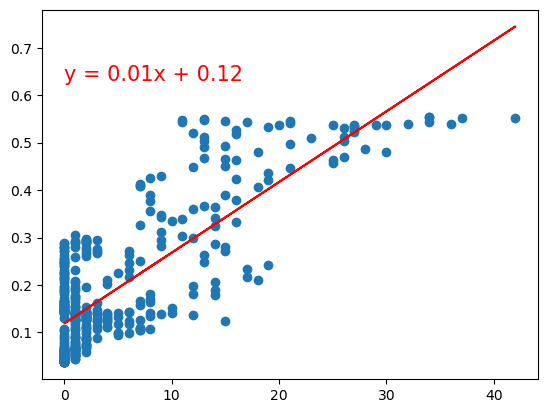

In [40]:
###keep for now 1.28.23    
column_clean("icu_patients_confirmed_influenza","adult_icu_bed_covid_utilization","date")
lin_reg(data1,data2,'Flu vs ICU COVID Utlization','Flu Cases','ICU COVID Utilization')

In [ ]:
#explanation^^^

The r-value is: 0.802502643364096.


NameError: name 'best_fit' is not defined

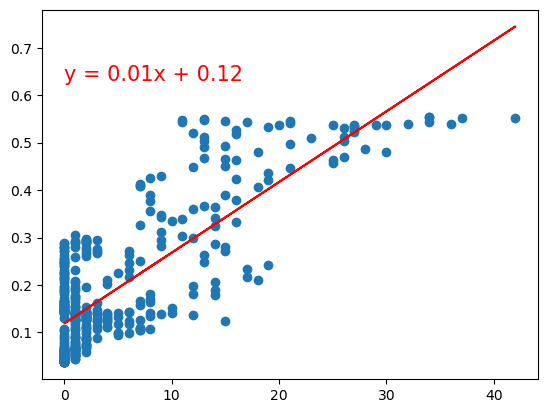

In [41]:
lin_reg(flu_patients,icu_util,'Flu vs ICU COVID Utlization','Flu Cases','ICU COVID Utilization')
#icu_util.dtype

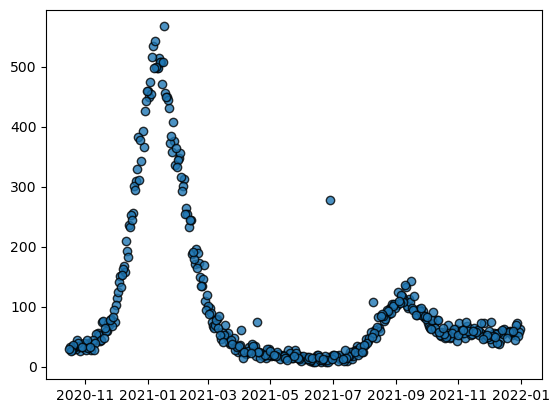

In [42]:
#GRAPH Q 1 WE STILL NEED NUMBER 2 :) VA to format
deaths = state_20_21_df["deaths_covid"].astype(int)
date = state_20_21_df["date"]

plt.scatter(date,deaths,
           edgecolor="black", linewidths=1, marker="o",
        alpha=0.8, label="Hospital Covid Deaths")

plt.show()
#numbers on the bottom diags, change date formats (m)
#labels and title, red dots,

In [ ]:
#GRAPH 1.B DEATHS, TO ICU BEDS  VA to format
# death_focus_df = california_df.loc[(california_df['date'] < '2021-04-30')
#                    #   & (california_df['date'] > '2020-10-01')]
# # deathsf = death_focus_df["deaths_covid"].astype(int)
# # date = death_focus_df["date"]

covid_icu = state_20_21_df["adult_icu_bed_covid_utilization"].astype(float)
plt.scatter(covid_icu,deaths,
           edgecolor="black", linewidths=1, marker="o",
        alpha=0.8, label="Hospital Covid Deaths")


plt.show()
#numbers on the bottom diags, change date formats (m)
#labels and title, red dots, 

In [ ]:
#line chart that plots, death, and covid ICU rates, check out how the relate. 

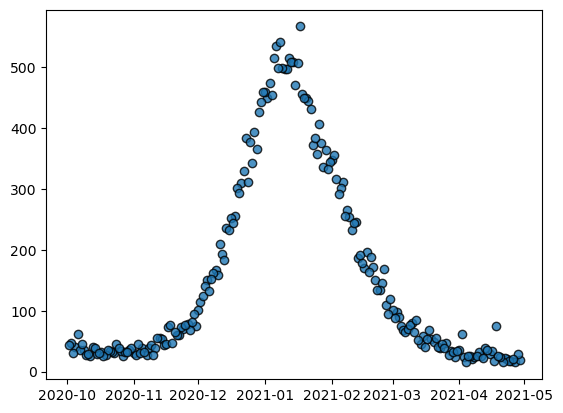

In [43]:
#JD to format #aestetics lets se if whe keep it 

death_focus_df = state_results_df.loc[(state_results_df['date'] < '2021-04-30')
                      & (state_results_df['date'] > '2020-10-01')]
deathsf = death_focus_df["deaths_covid"].astype(int)
datef = death_focus_df["date"]

plt.scatter(datef,deathsf,
           edgecolor="black", linewidths=1, marker="o",
        alpha=0.8, label="Hospital Covid Deaths")

plt.show()
#numbers on the bottom diags, change date formats (m)
#labels and title, red dots, 

In [ ]:
###How did COVID ICU rates change throughout 2020-2021? Q2 graph 1 of 2 JD to format
plt.scatter(date,covid_icu,
           edgecolor="black", linewidths=1, marker="o",
        alpha=0.8, label="Hospital Covid ICU rates Over Time")

plt.show()

c:\Users\jduck\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\jduck\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\Users\jduck\anaconda3\envs\PythonData\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying 

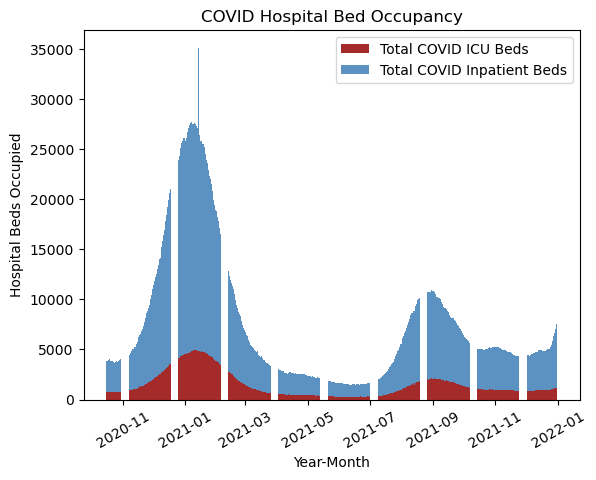

In [53]:
### Q3 #1 Graph Jennifer Dickworth to clean 
# inpatient_beds_used_covid     adult_icu_bed_covid_utilization_numerator
# labels = date
# inpatient_beds_used_covid = q3_df["inpatient_beds_used_covid"].astype(int)
# adult_icu_bed_covid_utilization_numerator = q3_df['adult_icu_bed_covid_utilization_numerator'].astype(int)
column_clean("adult_icu_bed_covid_utilization_numerator","inpatient_beds_used_covid","date")
width = 0.85 
fig, ax = plt.subplots()

ax.bar(new_date,data1, width, color = "#A52A2A")
ax.bar(new_date,data2, width,bottom = data1, color = "#5B92C2")
plt.title("COVID Hospital Bed Occupancy")
plt.xlabel("Year-Month")
plt.xticks(rotation = 30)
plt.ylabel("Hospital Beds Occupied")
plt.legend(["Total COVID ICU Beds","Total COVID Inpatient Beds"])
plt.show()

#numbers on the bottom diags, change date formats (m)
#labels and title, red dots, 

In [ ]:
#explanation^^^

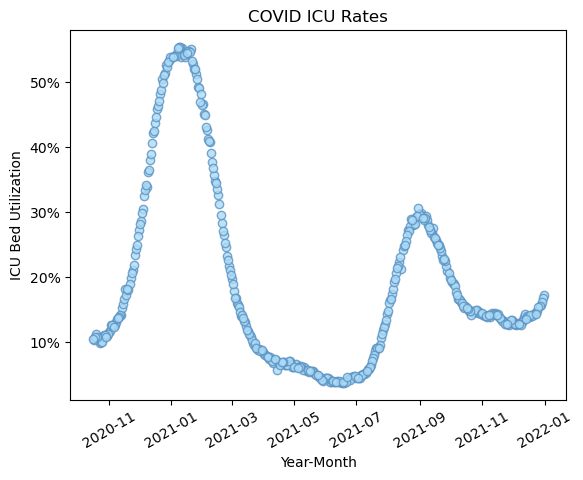

In [63]:
#Q2B BRAPH 1 How did staffing change throughout 2020-2021?
###How did COVID ICU rates change throughout 2020-2021? Q2 graph 1 of 2 
covid_icu = state_20_21_df["adult_icu_bed_covid_utilization"].astype(float)
date = state_20_21_df["date"]
labels = ["10%", "20%", "30%", "40%", "50%"]
plt.scatter(date,covid_icu,
           edgecolor="#5B92C2", linewidths=1, marker="o",
        alpha=0.8, label="Hospital COVID ICU rates Over Time", color = "#ABDBF7")

plt.title("COVID ICU Rates")
plt.xlabel("Year-Month")
plt.xticks(rotation = 30)
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5], labels)
plt.ylabel("ICU Bed Utilization")
plt.show()


In [ ]:
#Q4 How did staffing change throughout 2020-2021 

In [46]:
# critical_staffing_shortage_today_yes	critical_staffing_shortage_today_no	critical_staffing_shortage_today_not_reported	critical_staffing_shortage_anticipated_within_week_yes	critical_staffing_shortage_anticipated_within_week_no
column_clean("critical_staffing_shortage_today_yes","deaths_covid","date")

c:\Users\jduck\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\jduck\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\Users\jduck\anaconda3\envs\PythonData\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying 

The r-value is: 0.8639924229117005.


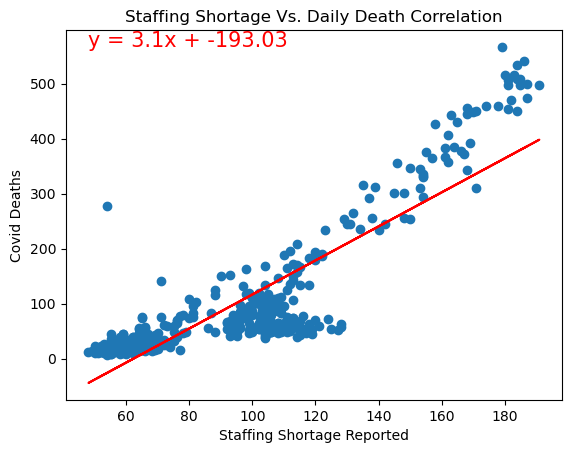

In [ ]:
#Q4
lin_reg(data1,data2,"Staffing Shortage Vs. Daily Death Correlation","Staffing Shortage Reported","Covid Deaths")


In [ ]:
#explanation^^^

The r-value is: -0.6205173674908134.


c:\Users\jduck\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\jduck\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


NameError: name 'best_fit' is not defined

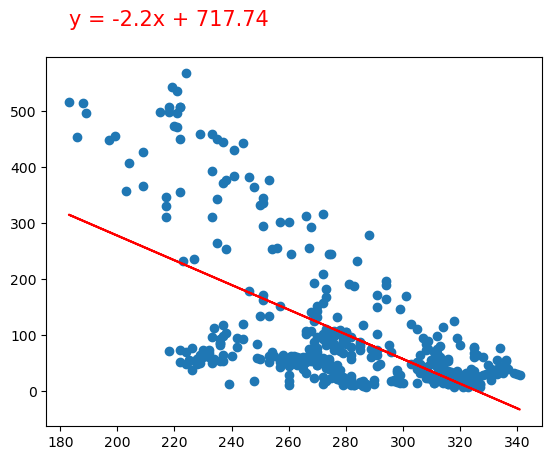

In [47]:
#Q4
column_clean("critical_staffing_shortage_today_no","deaths_covid","date")

lin_reg(data1,data2,"No Staffing Shortage Vs. Daily Death Correlation","No Staffing Shortage Reported","Covid Deaths")


In [ ]:
#explanation^^^

[1656.0, 18446.0, 28774.0, 33977.0, 50576.0, 59686.0, 50520.0, 46826.0]


c:\Users\jduck\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.
c:\Users\jduck\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


<function matplotlib.pyplot.show(close=None, block=None)>

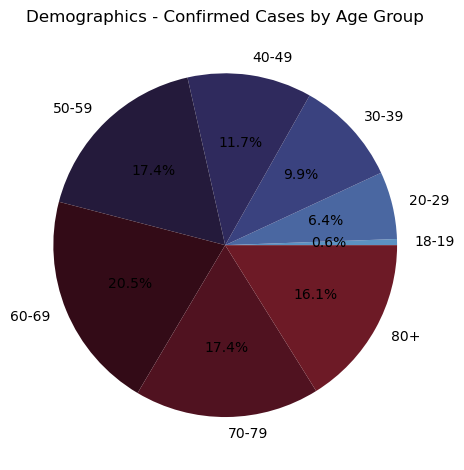

In [58]:
#Q3

state_20_21_df.columns=state_20_21_df.columns.str.replace("-","_")
state_20_21_df.columns=state_20_21_df.columns.str.replace("+","")

colors = ["#5B92C2", "#4A67A1", "#3A427F", "#2F2A5D", "#241A3B", "#330B17", "#501220", "#6D1A26", "#892229", "#A52A2A"]
ages = ["previous_day_admission_adult_covid_confirmed_18_19", "previous_day_admission_adult_covid_confirmed_20_29", "previous_day_admission_adult_covid_confirmed_30_39", "previous_day_admission_adult_covid_confirmed_40_49", "previous_day_admission_adult_covid_confirmed_50_59", "previous_day_admission_adult_covid_confirmed_60_69", "previous_day_admission_adult_covid_confirmed_70_79", "previous_day_admission_adult_covid_confirmed_80"]
age_group_list = ["18-19","20-29","30-39","40-49","50-59","60-69","70-79","80+"]
age_sum = []
for age in ages:
    state_20_21_df[age] = state_20_21_df[age].astype(float)
    sum_group = state_20_21_df[age].sum()
    age_sum.append(sum_group)
print(age_sum)

plt.pie(age_sum,labels=age_group_list,autopct='%1.1f%%', colors = colors)
plt.title('Demographics - Confirmed Cases by Age Group')
plt.tight_layout()
plt.show





In [ ]:
#explanation^^^

c:\Users\jduck\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[1369.0, 12221.0, 19014.0, 17963.0, 28644.0, 38103.0, 35921.0, 34507.0]


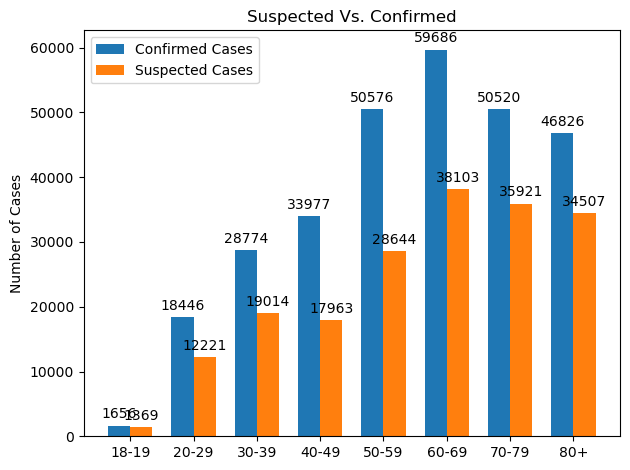

In [49]:
suspected_ages = [
"previous_day_admission_adult_covid_suspected_18_19",
"previous_day_admission_adult_covid_suspected_20_29",
"previous_day_admission_adult_covid_suspected_30_39",
"previous_day_admission_adult_covid_suspected_40_49", 
"previous_day_admission_adult_covid_suspected_50_59",
"previous_day_admission_adult_covid_suspected_60_69", 
"previous_day_admission_adult_covid_suspected_70_79",
"previous_day_admission_adult_covid_suspected_80_"]


suspected_sum = []
labels = age_group_list

for age in suspected_ages:
    state_20_21_df[age] = state_20_21_df[age].astype(float)
    sum_group = state_20_21_df[age].sum()
    suspected_sum.append(sum_group)
print(suspected_sum)


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, age_sum, width, label='Confirmed Cases')
rects2 = ax.bar(x + width/2, suspected_sum, width, label='Suspected Cases')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Cases')
ax.set_title('Suspected Vs. Confirmed')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()




In [ ]:
#explanation^^^

In [ ]:
### Conclusion
